<a href="https://colab.research.google.com/github/ryonce/World-Cup-Video-Sales/blob/main/World_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Cup Data

  - Robert Yonce
  - 3/23/23

## Imports


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_selector

## Data Import and Inspect

In [3]:
# Import the data

df = pd.read_csv('/content/WorldCupMatches.csv')
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


### Inspect Datatypes for Errors

In [4]:
# Inspecting categories and overall columns/rows

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [5]:
# Inspecting data for outliers that could be wrong

df.describe(include = 'all')

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
count,852.000000,852,852,852,852,852,852.000000,852.000000,852,852,850.000000,852.000000,852.000000,852,852,852,8.520000e+02,8.520000e+02,852,852
unique,NaN,602,23,181,151,78,NaN,NaN,83,43,NaN,NaN,NaN,366,387,408,NaN,NaN,77,82
top,NaN,27 May 1934 - 16:30,Round of 16,Estadio Azteca,Mexico City,Brazil,NaN,NaN,Mexico,,NaN,NaN,NaN,Ravshan IRMATOV (UZB),ACHIK Redouane (MAR),KOCHKAROV Bakhadyr (KGZ),NaN,NaN,BRA,MEX
freq,NaN,8,72,19,23,82,NaN,NaN,38,787,NaN,NaN,NaN,10,7,10,NaN,NaN,82,38
mean,1985.089202,NaN,NaN,NaN,NaN,NaN,1.811033,1.022300,NaN,NaN,45164.800000,0.708920,0.428404,NaN,NaN,NaN,1.066177e+07,6.134687e+07,NaN,NaN
std,22.448825,NaN,NaN,NaN,NaN,NaN,1.610255,1.087573,NaN,NaN,23485.249247,0.937414,0.691252,NaN,NaN,NaN,2.729613e+07,1.110572e+08,NaN,NaN
min,1930.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,2000.000000,0.000000,0.000000,NaN,NaN,NaN,2.010000e+02,2.500000e+01,NaN,NaN
25%,1970.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,30000.000000,0.000000,0.000000,NaN,NaN,NaN,2.620000e+02,1.188750e+03,NaN,NaN
50%,1990.000000,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,41579.500000,0.000000,0.000000,NaN,NaN,NaN,3.370000e+02,2.191000e+03,NaN,NaN
75%,2002.000000,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,61374.500000,1.000000,1.000000,NaN,NaN,NaN,2.497220e+05,4.395006e+07,NaN,NaN


## Data Clean Up

### Removing Duplicates

In [6]:
# Check for Duplicates

print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 3735 duplicate rows.


In [7]:
# Drop Duplicates

df.drop_duplicates(inplace = True)

In [8]:
# Checking sum again to make sure no more duplicated rows

print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### Inspect Columns and Data Values for Errors

In [9]:
# Inspect categorical columns values for errors

cat_selector = make_column_selector(dtype_include='object')(df)
for col in cat_selector:
  display(df[col].value_counts(normalize=True))

27 May 1934 - 16:30     0.009569
15 Jun 1958 - 19:00     0.008373
11 Jun 1958 - 19:00     0.008373
08 Jun 1958 - 19:00     0.008373
23 Jul 1966 - 15:00     0.004785
                          ...   
22 Jun 1994 - 19:30     0.001196
22 Jun 1994 - 16:00     0.001196
21 Jun 1994 - 16:00     0.001196
21 Jun 1994 - 19:30     0.001196
01 Jul 2014 - 17:00     0.001196
Name: Datetime, Length: 602, dtype: float64

Round of 16                 0.076555
Group 1                     0.074163
Quarter-finals              0.074163
Group A                     0.071770
Group B                     0.071770
Group 2                     0.070574
Group 3                     0.066986
Group 4                     0.065789
Group C                     0.057416
Group D                     0.057416
Group E                     0.057416
Group F                     0.057416
Semi-finals                 0.040670
Group G                     0.035885
Group H                     0.035885
Final                       0.022727
Match for third place       0.017943
Group 6                     0.014354
First round                 0.010766
Preliminary round           0.009569
Group 5                     0.007177
Third place                 0.002392
Play-off for third place    0.001196
Name: Stage, dtype: float64

Estadio Azteca             0.022727
Olympiastadion             0.016746
Jalisco                    0.016746
Nou Camp - Estadio Le�n    0.013158
Estadio Centenario         0.011962
                             ...   
Comunale di Cornaredo      0.001196
Rimnersvallen              0.001196
Tunavallen                 0.001196
White City                 0.001196
Eyravallen                 0.001196
Name: Stadium, Length: 181, dtype: float64

Mexico City        0.027512
Montevideo         0.021531
Guadalajara        0.020335
Johannesburg       0.017943
Rio De Janeiro     0.017943
                     ...   
Lugano             0.001196
Antibes            0.001196
Trieste            0.001196
Lille              0.001196
Orebro             0.001196
Name: City, Length: 151, dtype: float64

Brazil                        0.093301
Italy                         0.068182
Argentina                     0.062201
Germany FR                    0.051435
England                       0.041866
                                ...   
Wales                         0.001196
Norway                        0.001196
rn">United Arab Emirates      0.001196
Haiti                         0.001196
rn">Bosnia and Herzegovina    0.001196
Name: Home Team Name, Length: 78, dtype: float64

Mexico               0.044258
France               0.035885
Spain                0.034689
England              0.032297
Italy                0.031100
                       ...   
Dutch East Indies    0.001196
Togo                 0.001196
Cuba                 0.001196
Zaire                0.001196
Iraq                 0.001196
Name: Away Team Name, Length: 83, dtype: float64

                                                 0.931818
Italy win after extra time                       0.005981
Argentina win after extra time                   0.003589
Win on Golden Goal                               0.003589
England win after extra time                     0.003589
France win after extra time                      0.002392
France win on penalties (3 - 4)                  0.002392
Brazil win on penalties (3 - 2)                  0.002392
Belgium win after extra time                     0.002392
Germany win after extra time                     0.002392
Paraguay win on penalties (5 - 3)                0.001196
Uruguay win on penalties (4 - 2)                 0.001196
Ghana win after extra time                       0.001196
Spain win after extra time                       0.001196
Italy win on penalties (5 - 3)                   0.001196
Portugal win on penalties (1 - 3)                0.001196
Argentina win on penalties (2 - 4)               0.001196
Germany win on

Ravshan IRMATOV (UZB)             0.010766
LARRIONDA Jorge (URU)             0.009569
QUINIOU Joel (FRA)                0.009569
ARCHUNDIA Benito (MEX)            0.009569
DE BLEECKERE Frank (BEL)          0.008373
                                    ...   
LABO REVOREDO Enrique (PER)       0.001196
ITHURRALDE Arturo Andres (ARG)    0.001196
DWOMOH Benjamin (GHA)             0.001196
ESCHWEILER Walter (GER)           0.001196
Bakary GASSAMA (GAM)              0.001196
Name: Referee, Length: 366, dtype: float64

GONZALEZ ARCHUNDIA Alfonso (MEX)    0.008373
HERMANS Peter (BEL)                 0.008373
VERGARA Hector (CAN)                0.008373
BERANEK Alois (AUT)                 0.008373
FREDRIKSSON Erik (SWE)              0.007177
                                      ...   
McCABE George (ENG)                 0.001196
DIAZ GALVEZ Jorge (CHI)             0.001196
SALINAS Reynaldo (HON)              0.001196
ARANGO Jorge Luis (COL)             0.001196
GONZALEZ ROA Gabriel (PAR)          0.001196
Name: Assistant 1, Length: 387, dtype: float64

KOCHKAROV Bakhadyr (KGZ)    0.010766
VERGARA Hector (CAN)        0.008373
VROMANS Walter (BEL)        0.008373
LISTKIEWICZ Michal (POL)    0.008373
DANTE Dramane (MLI)         0.007177
                              ...   
TAREKEGN Seyoum (ETH)       0.001196
CHOI Duk Ryong (PRK)        0.001196
DAGNALL Kenneth (ENG)       0.001196
BAKHRAMOV Tofik (URS)       0.001196
KABANDA Felicien (RWA)      0.001196
Name: Assistant 2, Length: 408, dtype: float64

BRA    0.093301
ITA    0.068182
ARG    0.062201
FRG    0.051435
ENG    0.041866
         ...   
TRI    0.001196
BOL    0.001196
JAM    0.001196
HAI    0.001196
BIH    0.001196
Name: Home Team Initials, Length: 77, dtype: float64

MEX    0.044258
FRA    0.035885
ESP    0.034689
ENG    0.032297
ITA    0.031100
         ...   
ZAI    0.001196
INH    0.001196
IRQ    0.001196
CUB    0.001196
CZE    0.001196
Name: Away Team Initials, Length: 82, dtype: float64

In [10]:
df['Win conditions'].value_counts()

                                                 779
Italy win after extra time                         5
Argentina win after extra time                     3
Win on Golden Goal                                 3
England win after extra time                       3
France win after extra time                        2
France win on penalties (3 - 4)                    2
Brazil win on penalties (3 - 2)                    2
Belgium win after extra time                       2
Germany win after extra time                       2
Paraguay win on penalties (5 - 3)                  1
Uruguay win on penalties (4 - 2)                   1
Ghana win after extra time                         1
Spain win after extra time                         1
Italy win on penalties (5 - 3)                     1
Portugal win on penalties (1 - 3)                  1
Argentina win on penalties (2 - 4)                 1
Germany win on penalties (4 - 2)                   1
Ukraine win on penalties (0 - 3)              

### Create new Column for results

In [11]:
df['Winner'] = 'Home'
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home


In [12]:
# Create filters for Away and Draw results

away_win = df['Away Team Goals'] > df['Home Team Goals']
draw = df['Away Team Goals'] == df['Home Team Goals']

df.loc[away_win, 'Winner'] = 'Away'
df.loc[draw, 'Winner'] = 'Draw'

### Missing Values

In [13]:
# Display the total number of missing values

print(f'There are {df.isna().sum().sum()} missing values.')

There are 21 missing values.


In [14]:
# Display the count of missing values by column

print(df.isna().sum())

Year                    1
Datetime                1
Stage                   1
Stadium                 1
City                    1
Home Team Name          1
Home Team Goals         1
Away Team Goals         1
Away Team Name          1
Win conditions          1
Attendance              2
Half-time Home Goals    1
Half-time Away Goals    1
Referee                 1
Assistant 1             1
Assistant 2             1
RoundID                 1
MatchID                 1
Home Team Initials      1
Away Team Initials      1
Winner                  0
dtype: int64


In [15]:
# Find the rows that have the missing info

df[df.isna().any(axis = 1)]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,...,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG,Home
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home


In [16]:
# This is an empty row

df = df.drop(index = 852)

- The 823 index missing attendance I will fill doing a calculation of mean attendance for games in 2014 and impute.

In [17]:
# Finding Attendance

df.groupby('Year')['Attendance'].mean()

# Will take 53,759 as we can not have a float

Year
1930.0    32808.277778
1934.0    21352.941176
1938.0    20872.222222
1950.0    47511.181818
1954.0    29561.807692
1958.0    23423.142857
1962.0    27911.625000
1966.0    48847.968750
1970.0    50124.218750
1974.0    49098.763158
1978.0    40678.710526
1982.0    40571.596154
1986.0    46039.057692
1990.0    48388.750000
1994.0    68991.115385
1998.0    43517.187500
2002.0    42268.703125
2006.0    52491.234375
2010.0    49669.625000
2014.0    53758.888889
Name: Attendance, dtype: float64

In [18]:
# Fill missing data

df['Attendance'].fillna(value = 53759, inplace = True)

## Target and Features

In [25]:
# Was unsure which columns I would actually use until I started imputed them in.

X = df[['Home Team Goals', 'Away Team Goals', 'Stadium', 'Home Team Name', 'Away Team Name', 'City', 
       'Half-time Home Goals', 'Half-time Away Goals', 'Year', 'Referee', 'Assistant 1', 'Assistant 2', 'Stage']]

y = df['Winner']

## Visuals

### Home Team Goals Visual

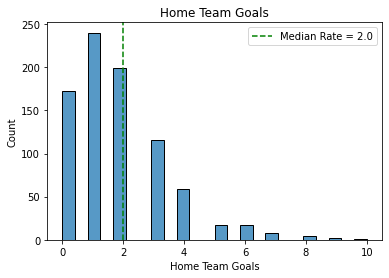

In [ ]:
# Histogram plot with Seaborn

ax = sns.histplot(data = df, x = 'Home Team Goals')

ax.set(title = 'Home Team Goals')

median = df['Home Team Goals'].median()

ax.axvline(median, color = 'g', ls = '--', 
           label = f'Median Rate = {median}')

ax.legend();

- This graph shows that most 'home' teams score around 2 or below. The median is right at 2 goals per game.

### Away Team Goals Visual

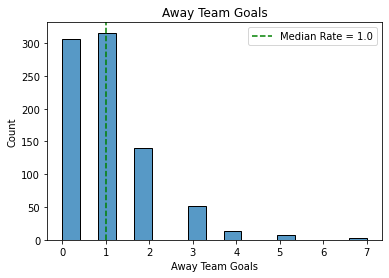

In [51]:
# Histogram plot with Seaborn

ax = sns.histplot(data = df, x = 'Away Team Goals')

ax.set(title = 'Away Team Goals')

median = df['Away Team Goals'].median()

ax.axvline(median, color = 'g', ls = '--', 
           label = f'Median Rate = {median}')

ax.legend();

- This graph shows that most 'away' teams score around 1 or below. The median is right at 1 goal per game.

### Stadium Visual

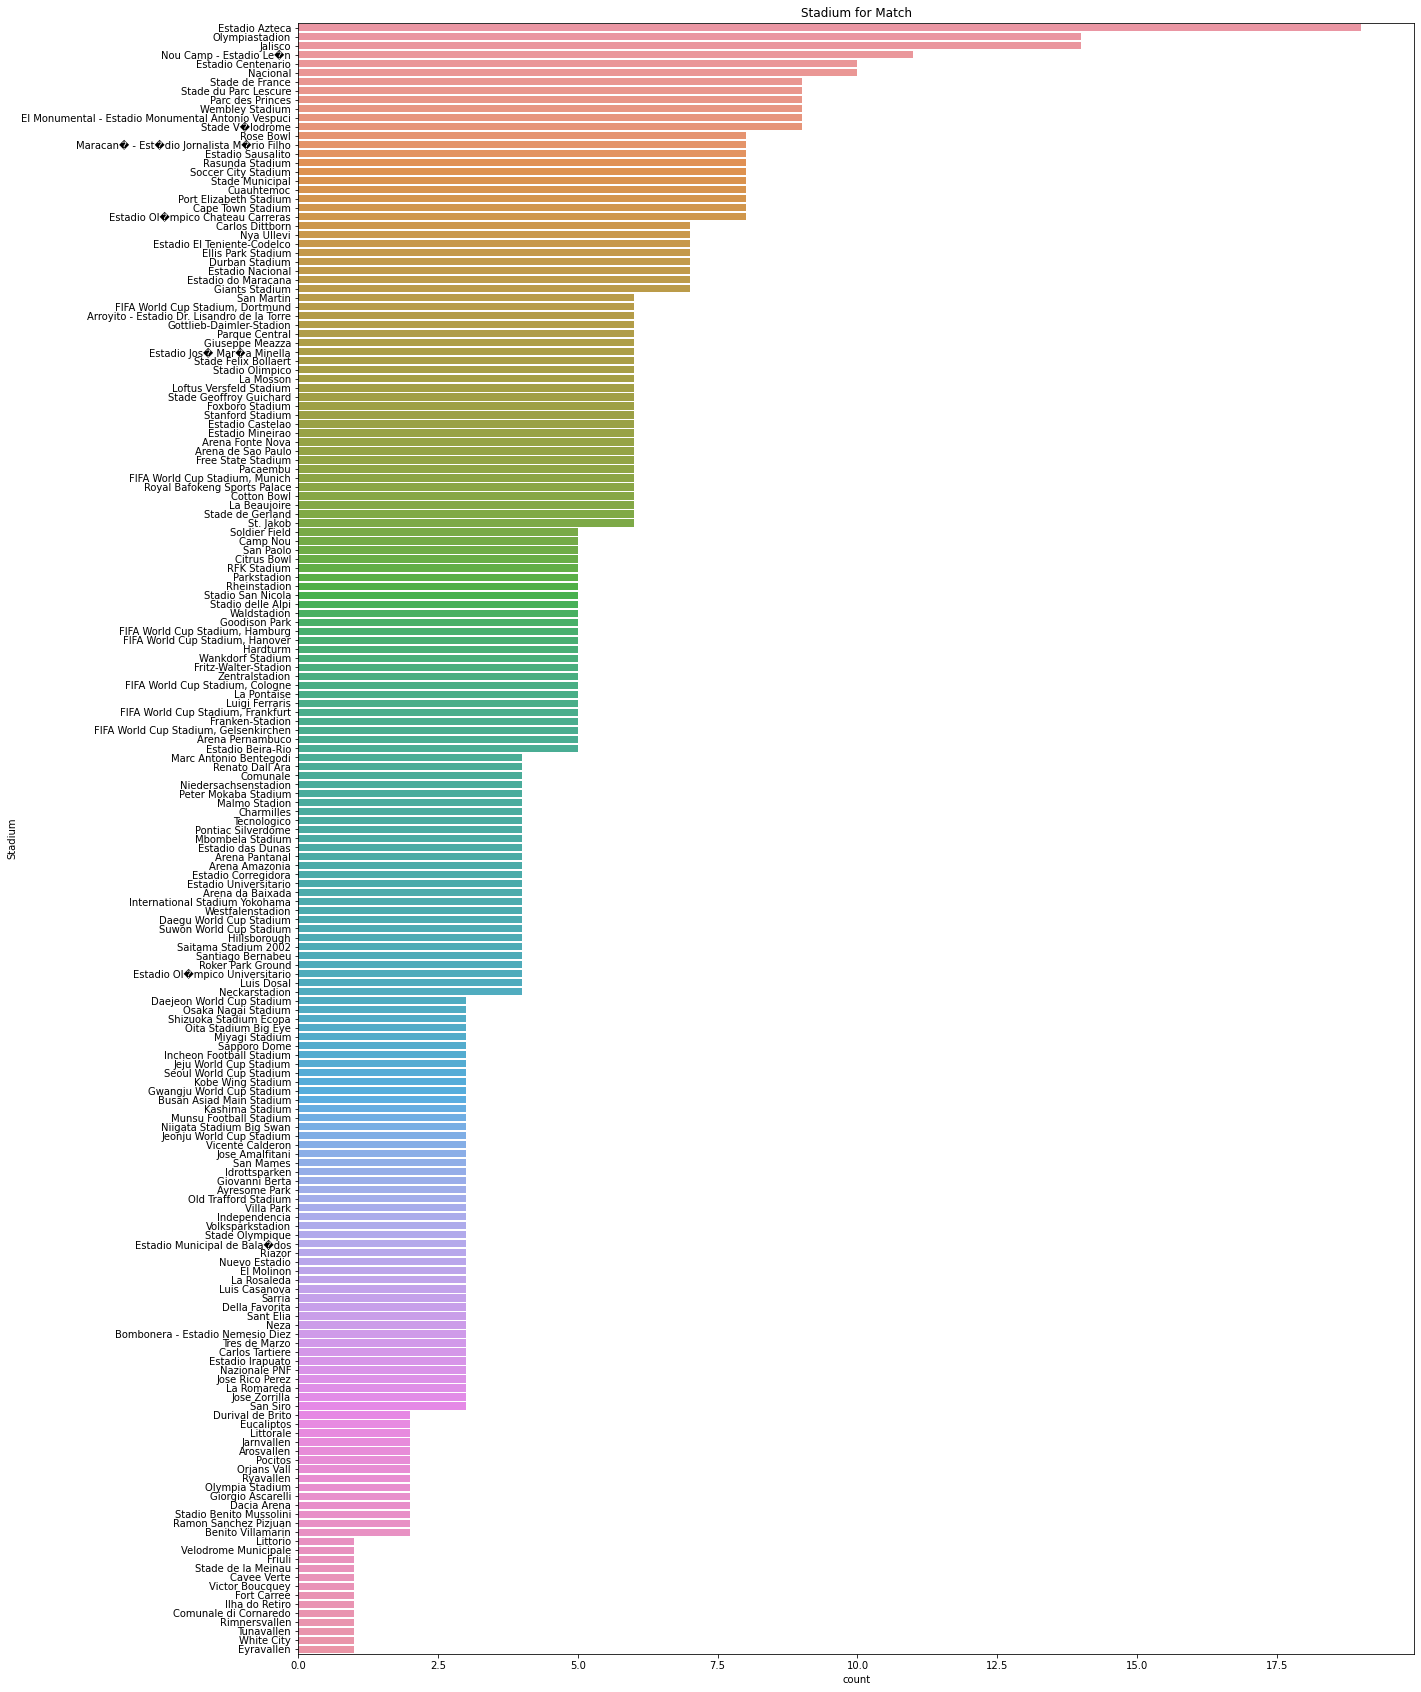

In [31]:
# Count plot showing the Stadium for each World Cup

fig, ax = plt.subplots(figsize=(20,30))

sns.countplot(data = df, y = 'Stadium', order = df['Stadium'].value_counts().index)

ax.set(title = 'Stadium for Match')
ax.set(ylabel = 'Stadium');

- Every Stadium that has hosted a World Cup Game

### Home Team Visual

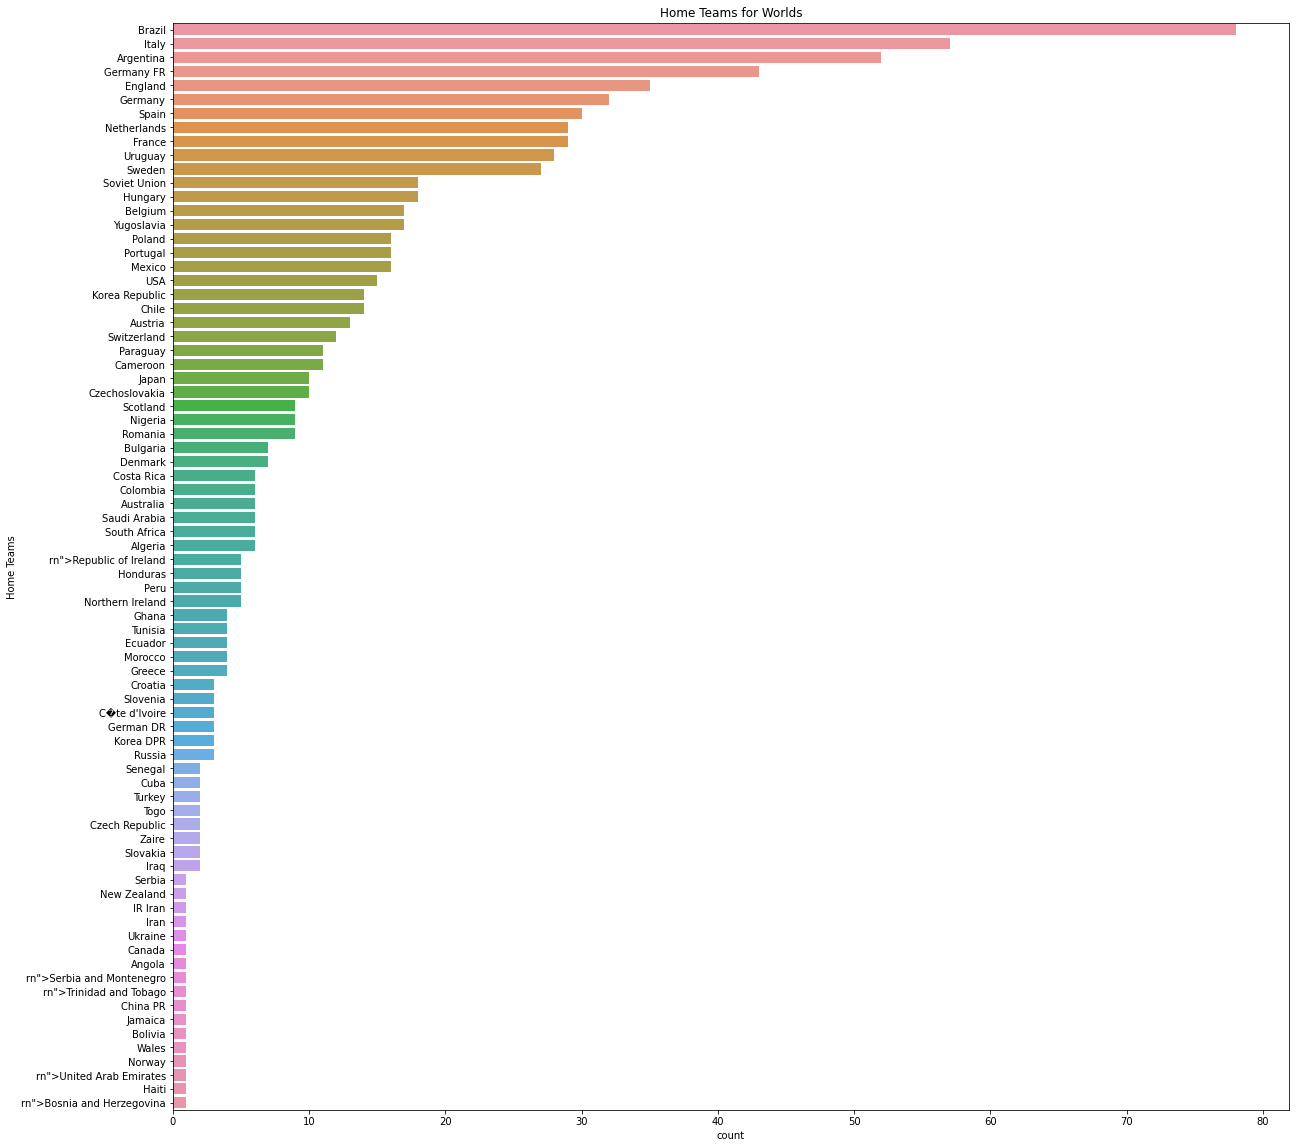

In [32]:
# Count plot showing the Home Teams for each World Cup

fig, ax = plt.subplots(figsize=(20,20))

sns.countplot(data = df, y = 'Home Team Name', order = df['Home Team Name'].value_counts().index)

ax.set(title = 'Home Teams for Worlds')
ax.set(ylabel = 'Home Teams');


- The home team for each World Cup Match

### Away Team Visual

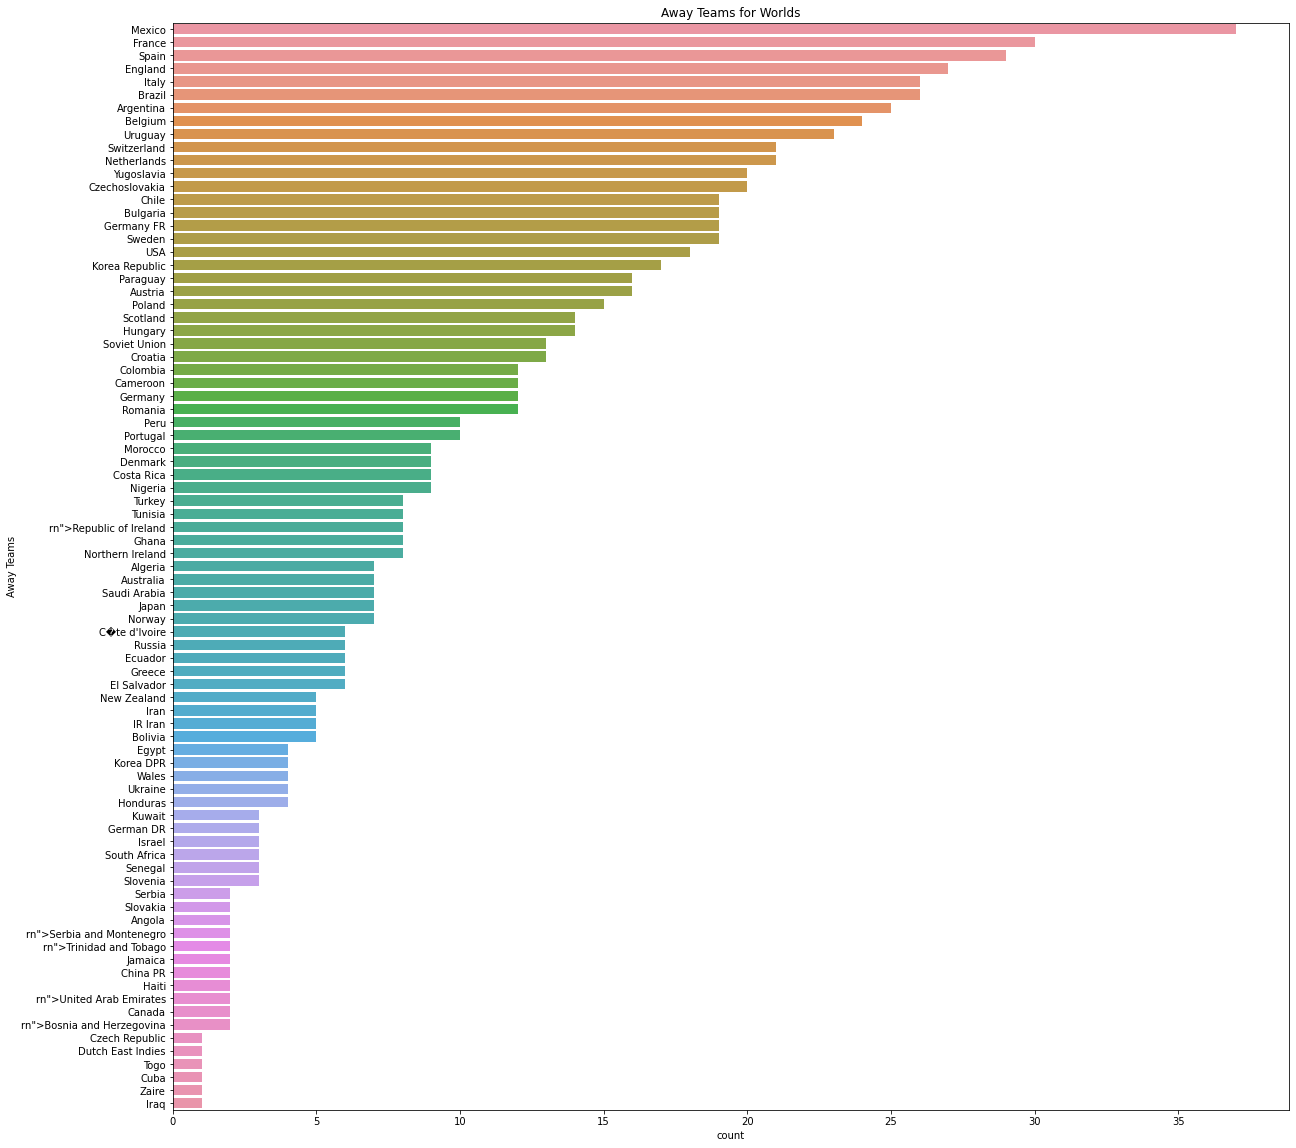

In [33]:
# Count plot showing the Away Teams for each World Cup

fig, ax = plt.subplots(figsize=(20,20))

sns.countplot(data = df, y = 'Away Team Name', order = df['Away Team Name'].value_counts().index)

ax.set(title = 'Away Teams for Worlds')
ax.set(ylabel = 'Away Teams');

- The away team for each World Cup Match

### City Visual

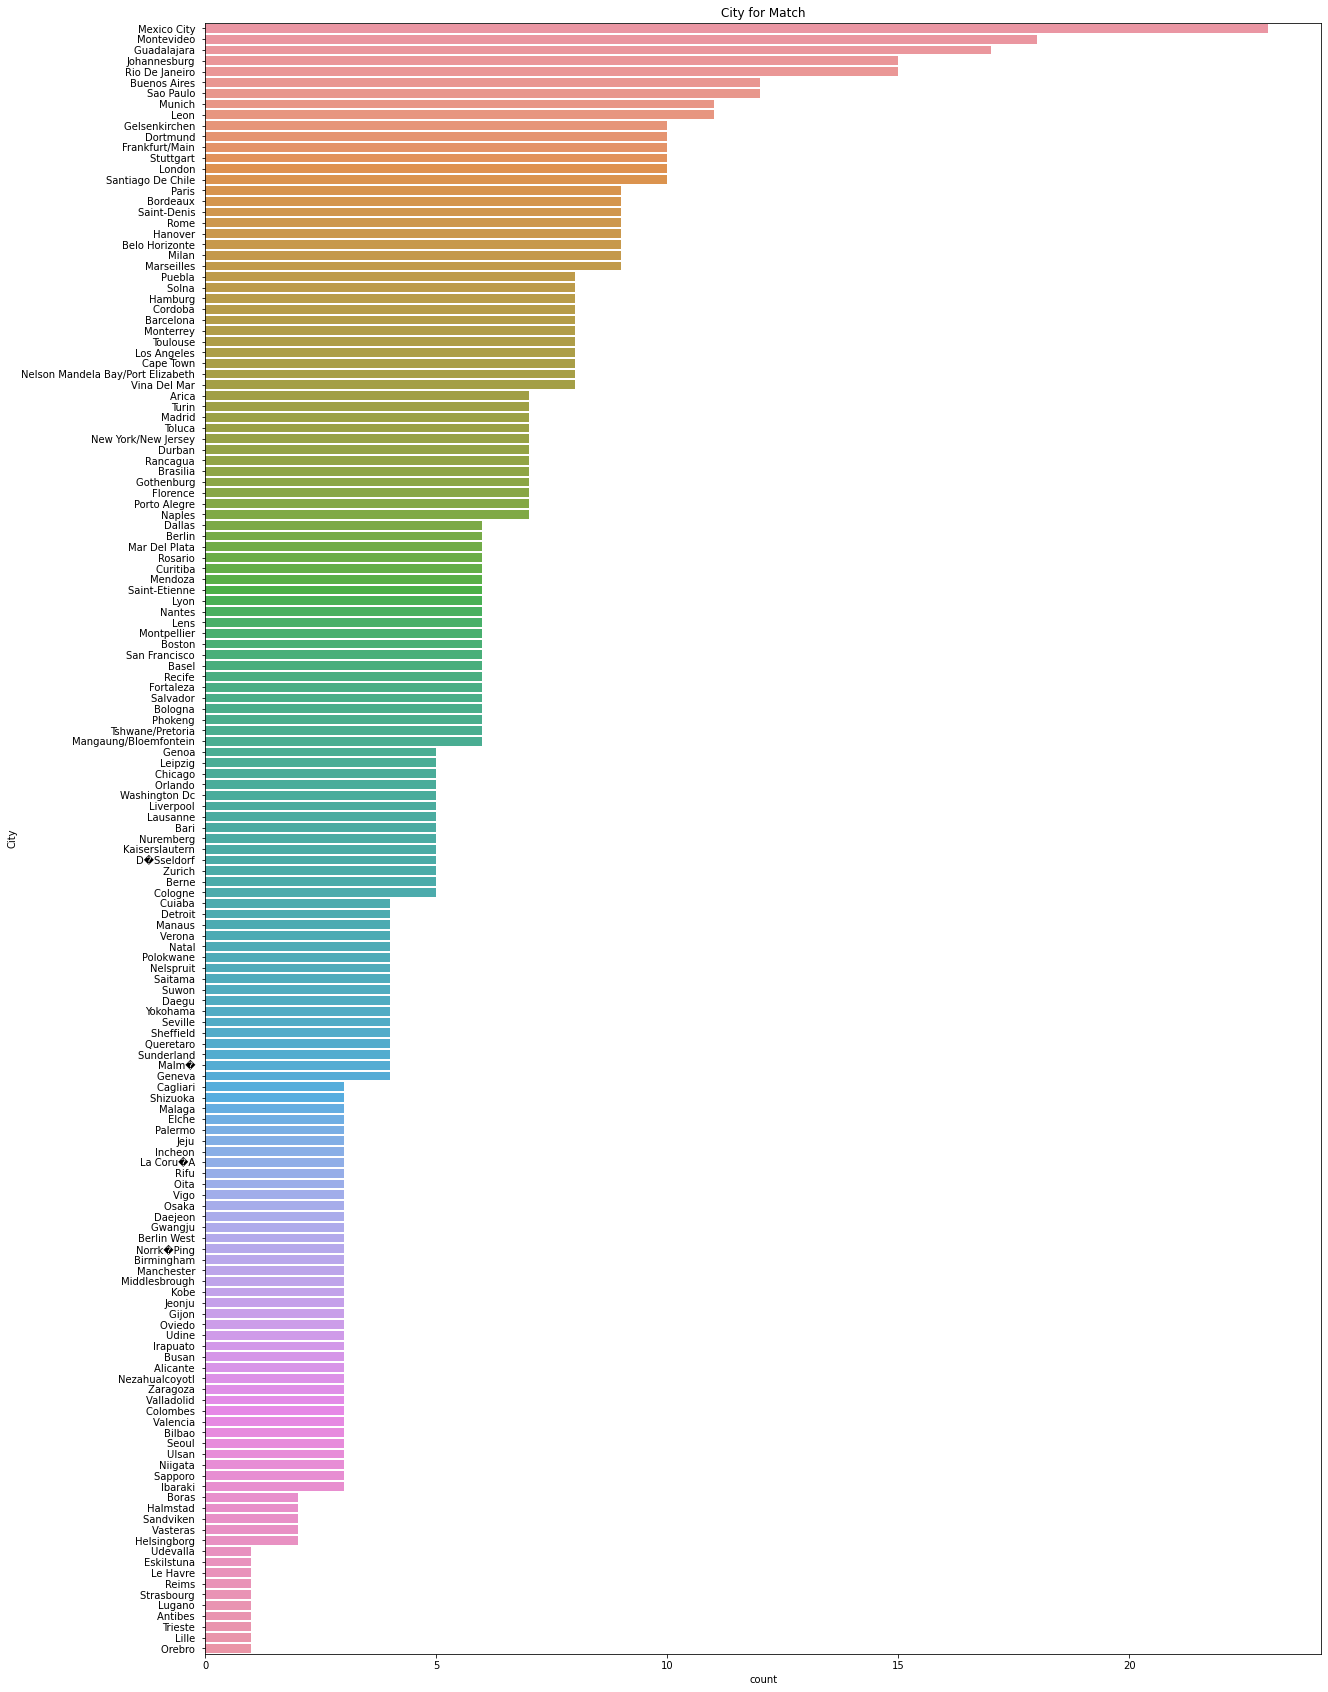

In [34]:
# Count plot showing the City for each World Cup

fig, ax = plt.subplots(figsize=(20,30))

sns.countplot(data = df, y = 'City', order = df['City'].value_counts().index)

ax.set(title = 'City for Match')
ax.set(ylabel = 'City');


- The cities that have hosted a World Cup Match

### Half-time Home Goals Visual

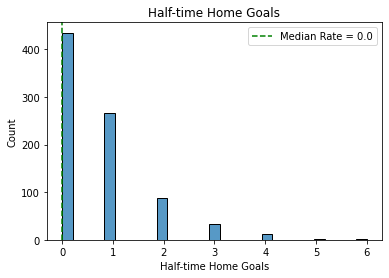

In [70]:
# Histogram plot with Seaborn

ax = sns.histplot(data = df, x = 'Half-time Home Goals')

ax.set(title = 'Half-time Home Goals')

median = df['Half-time Home Goals'].median()

ax.axvline(median, color = 'g', ls = '--', 
           label = f'Median Rate = {median}')

ax.legend();

- This shows the Half-time Home goals for each game. The median is surprisely at 0!

### Half-time Away Goals Visual

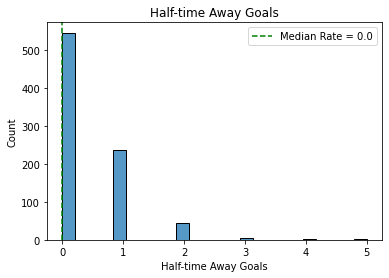

In [74]:
# Histogram plot with Seaborn

ax = sns.histplot(data = df, x = 'Half-time Away Goals')

ax.set(title = 'Half-time Away Goals')

median = df['Half-time Away Goals'].median()

ax.axvline(median, color = 'g', ls = '--', 
           label = f'Median Rate = {median}')

ax.legend();

- This shows the Half-time Away goals for each game. The median is surprisely at 0!

### Year Visual

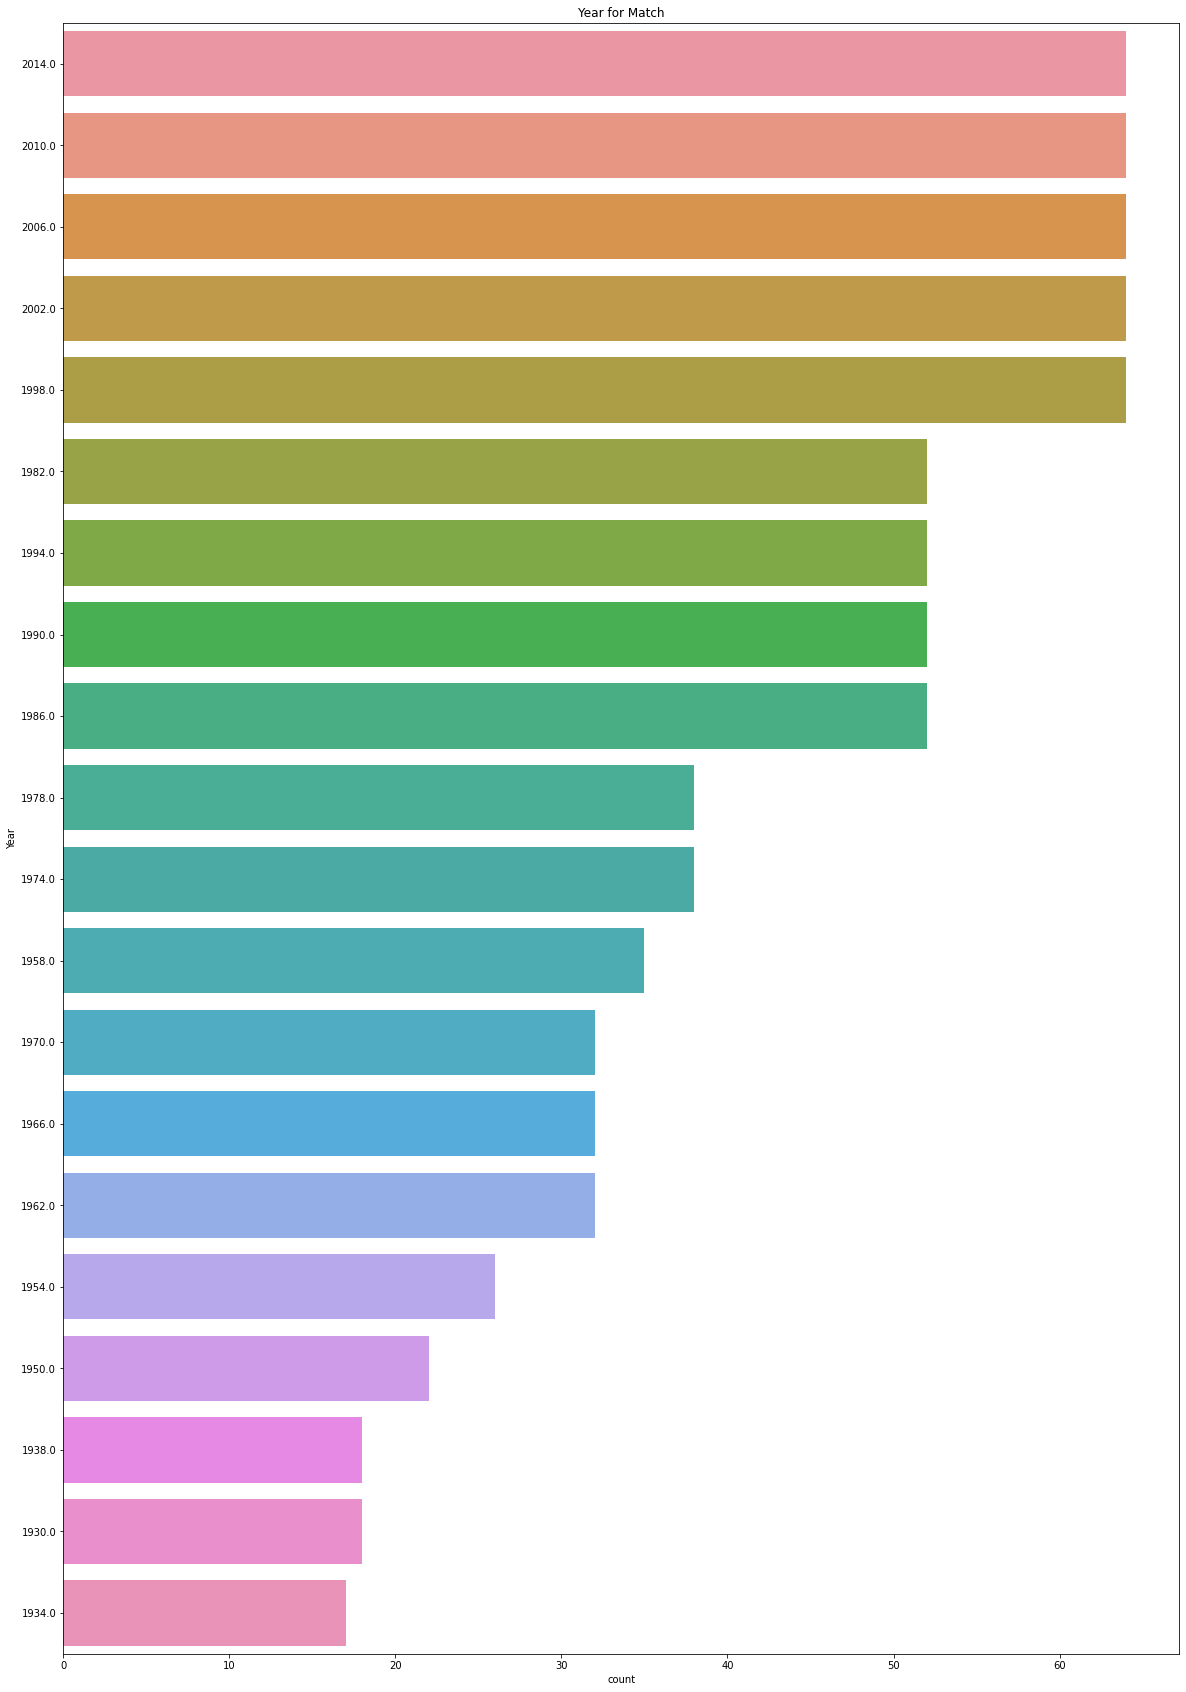

In [29]:
# Count plot showing the Year for each World Cup

fig, ax = plt.subplots(figsize=(20,30))

sns.countplot(data = df, y = 'Year', order = df['Year'].value_counts().index)

ax.set(title = 'Year for Match')
ax.set(ylabel = 'Year');

- This graph shows the amount of games played in each World Cup Year.

### Refereee Visual

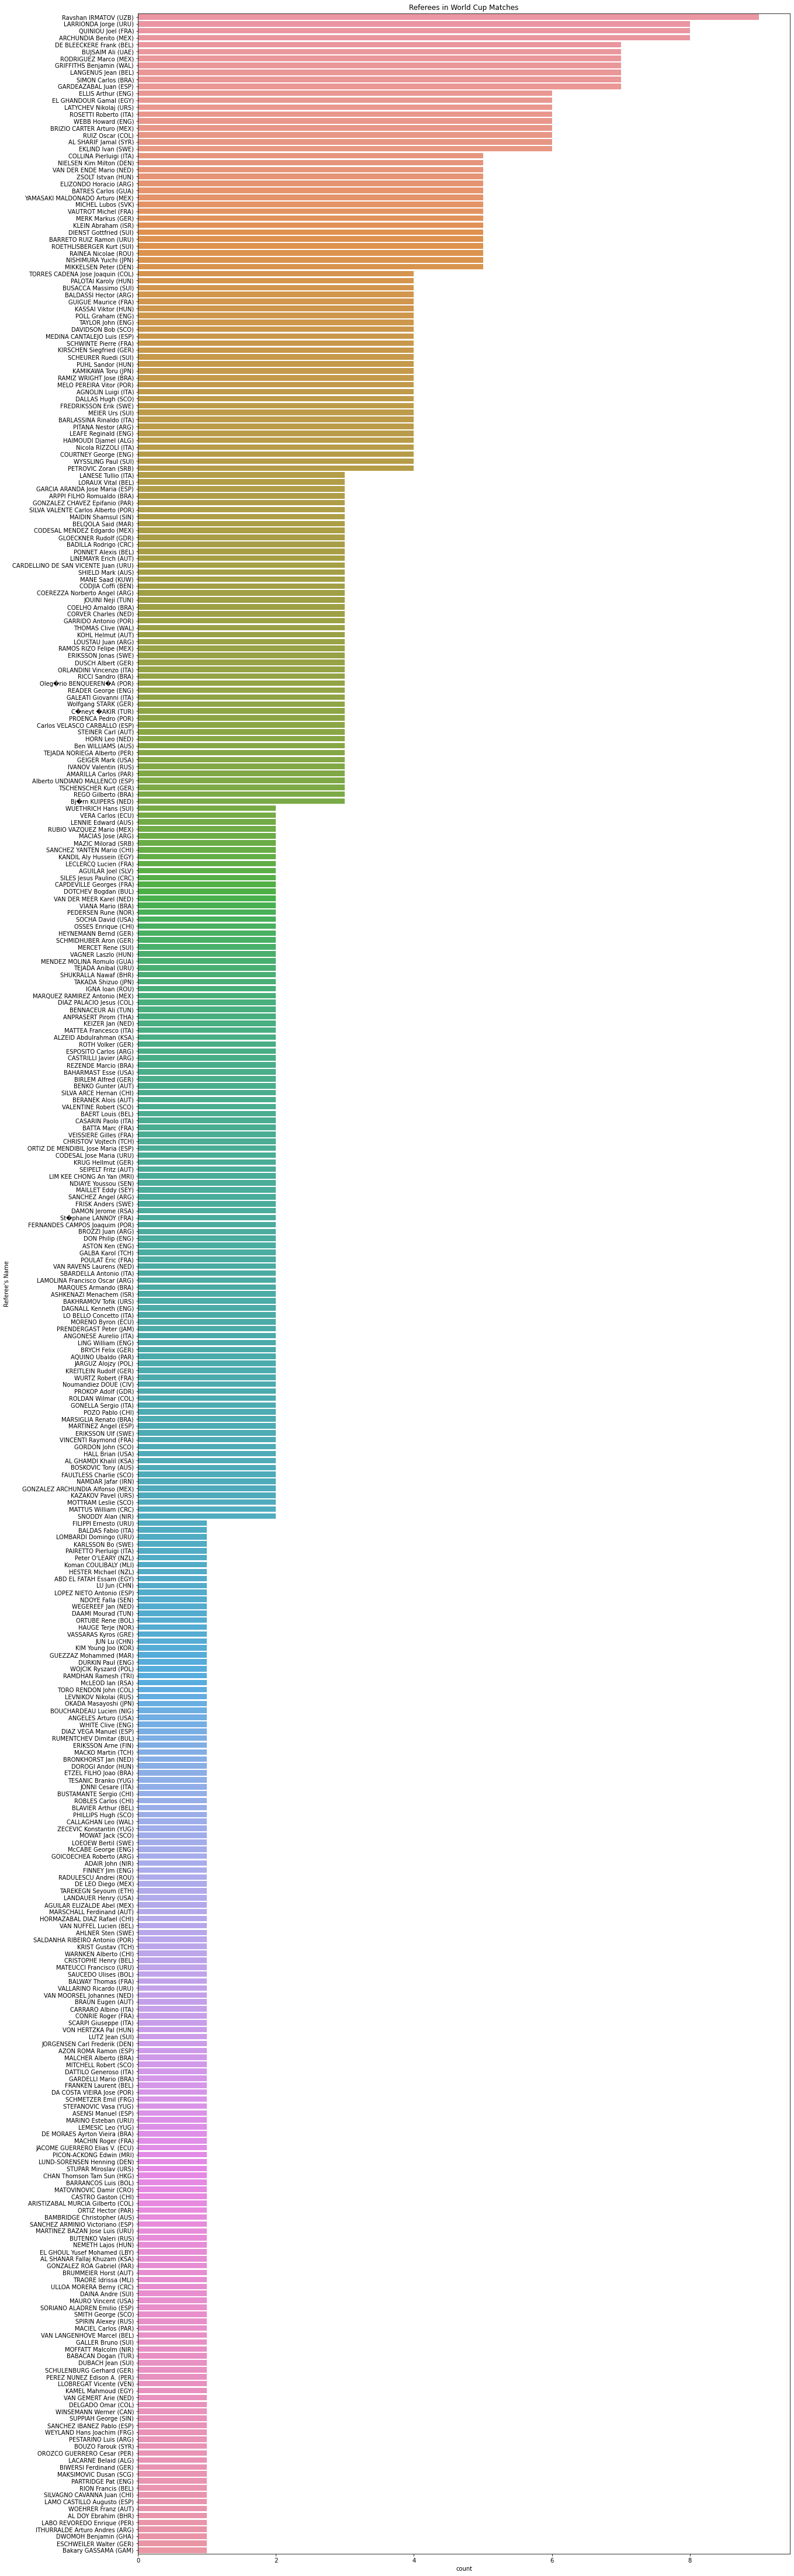

In [35]:
# Count plot showing the Referee for each World Cup

fig, ax = plt.subplots(figsize=(20,80))

sns.countplot(data = df, y = 'Referee', order = df['Referee'].value_counts().index)

ax.set(title = 'Referees in World Cup Matches')
ax.set(ylabel = "Referee's Name");

- The list of Referees that have called a World Cup Match.

### Assistant 1  Visual

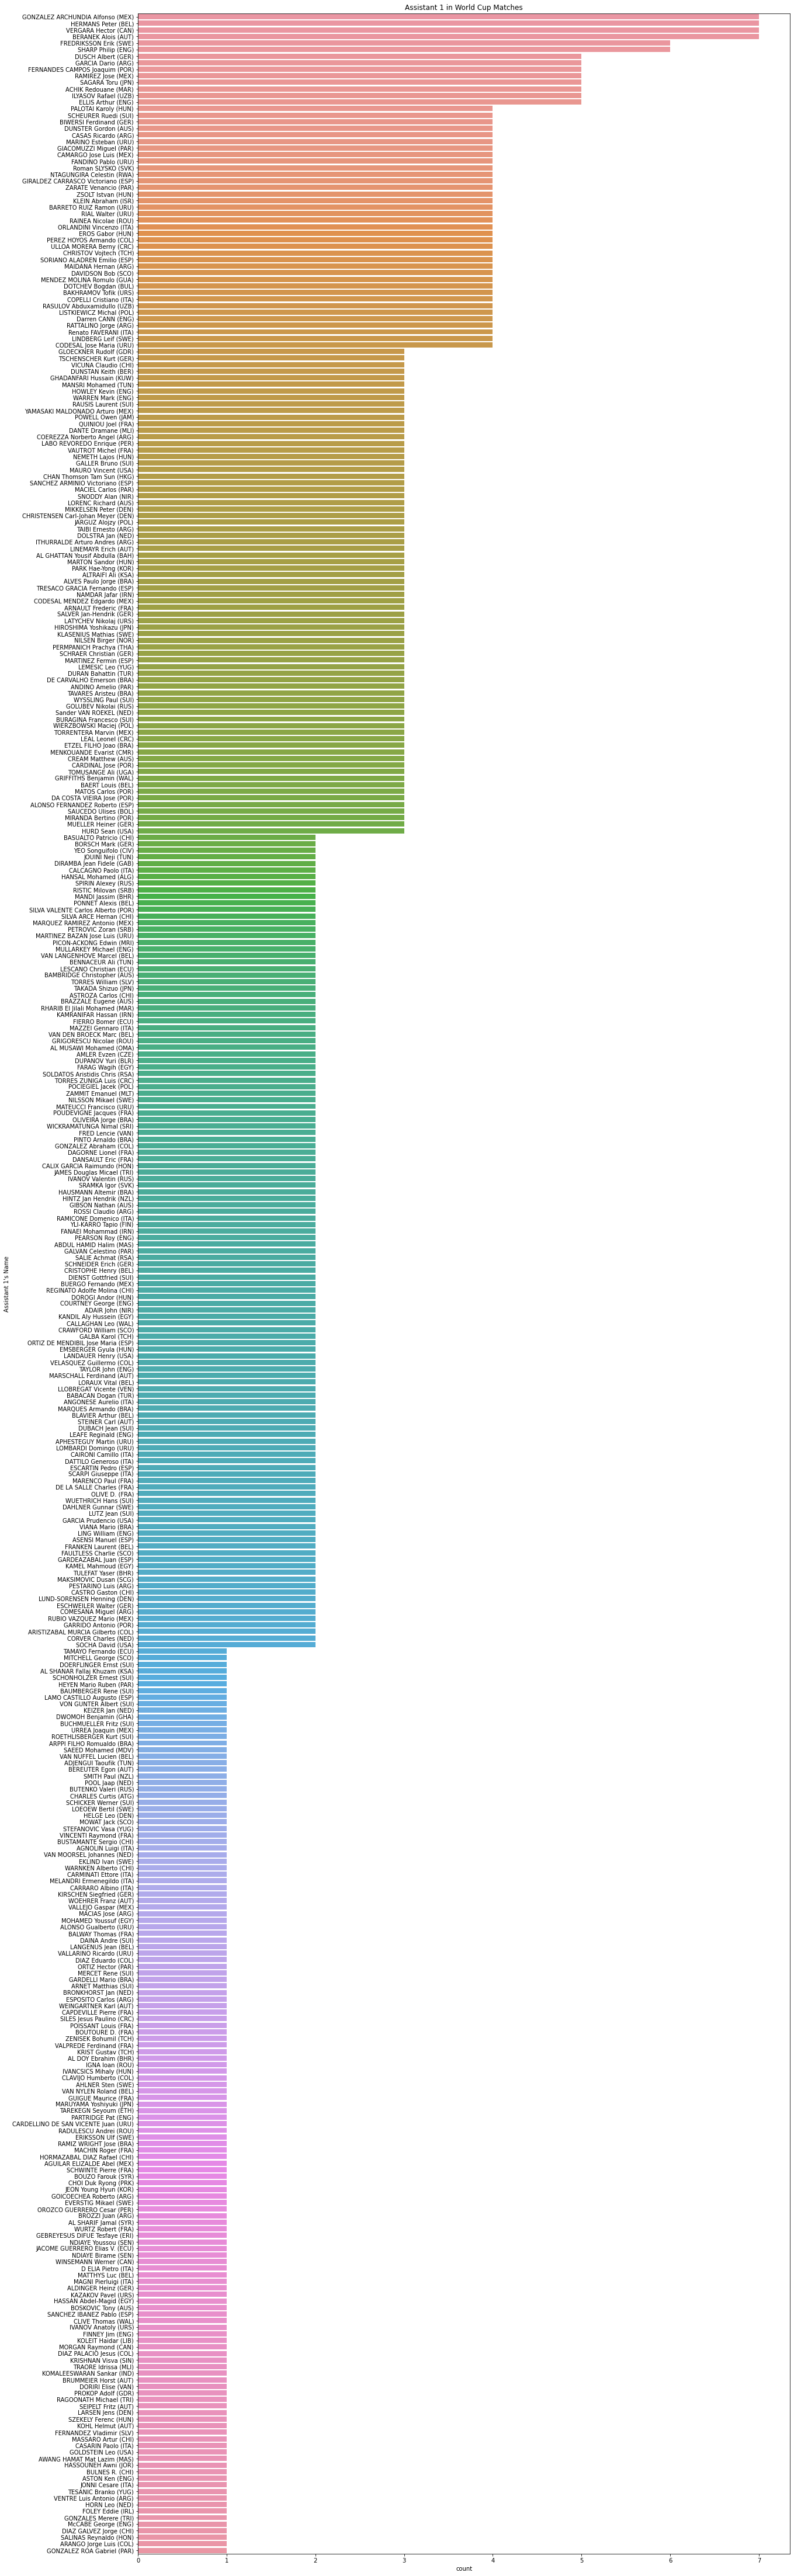

In [36]:
# Count plot showing the Assisant 1 for each World Cup

fig, ax = plt.subplots(figsize=(20,80))

sns.countplot(data = df, y = 'Assistant 1', order = df['Assistant 1'].value_counts().index)

ax.set(title = 'Assistant 1 in World Cup Matches')
ax.set(ylabel = "Assistant 1's Name");

- The list of Assistant 1 that have called a World Cup Match.

### Assistant 2 Visual

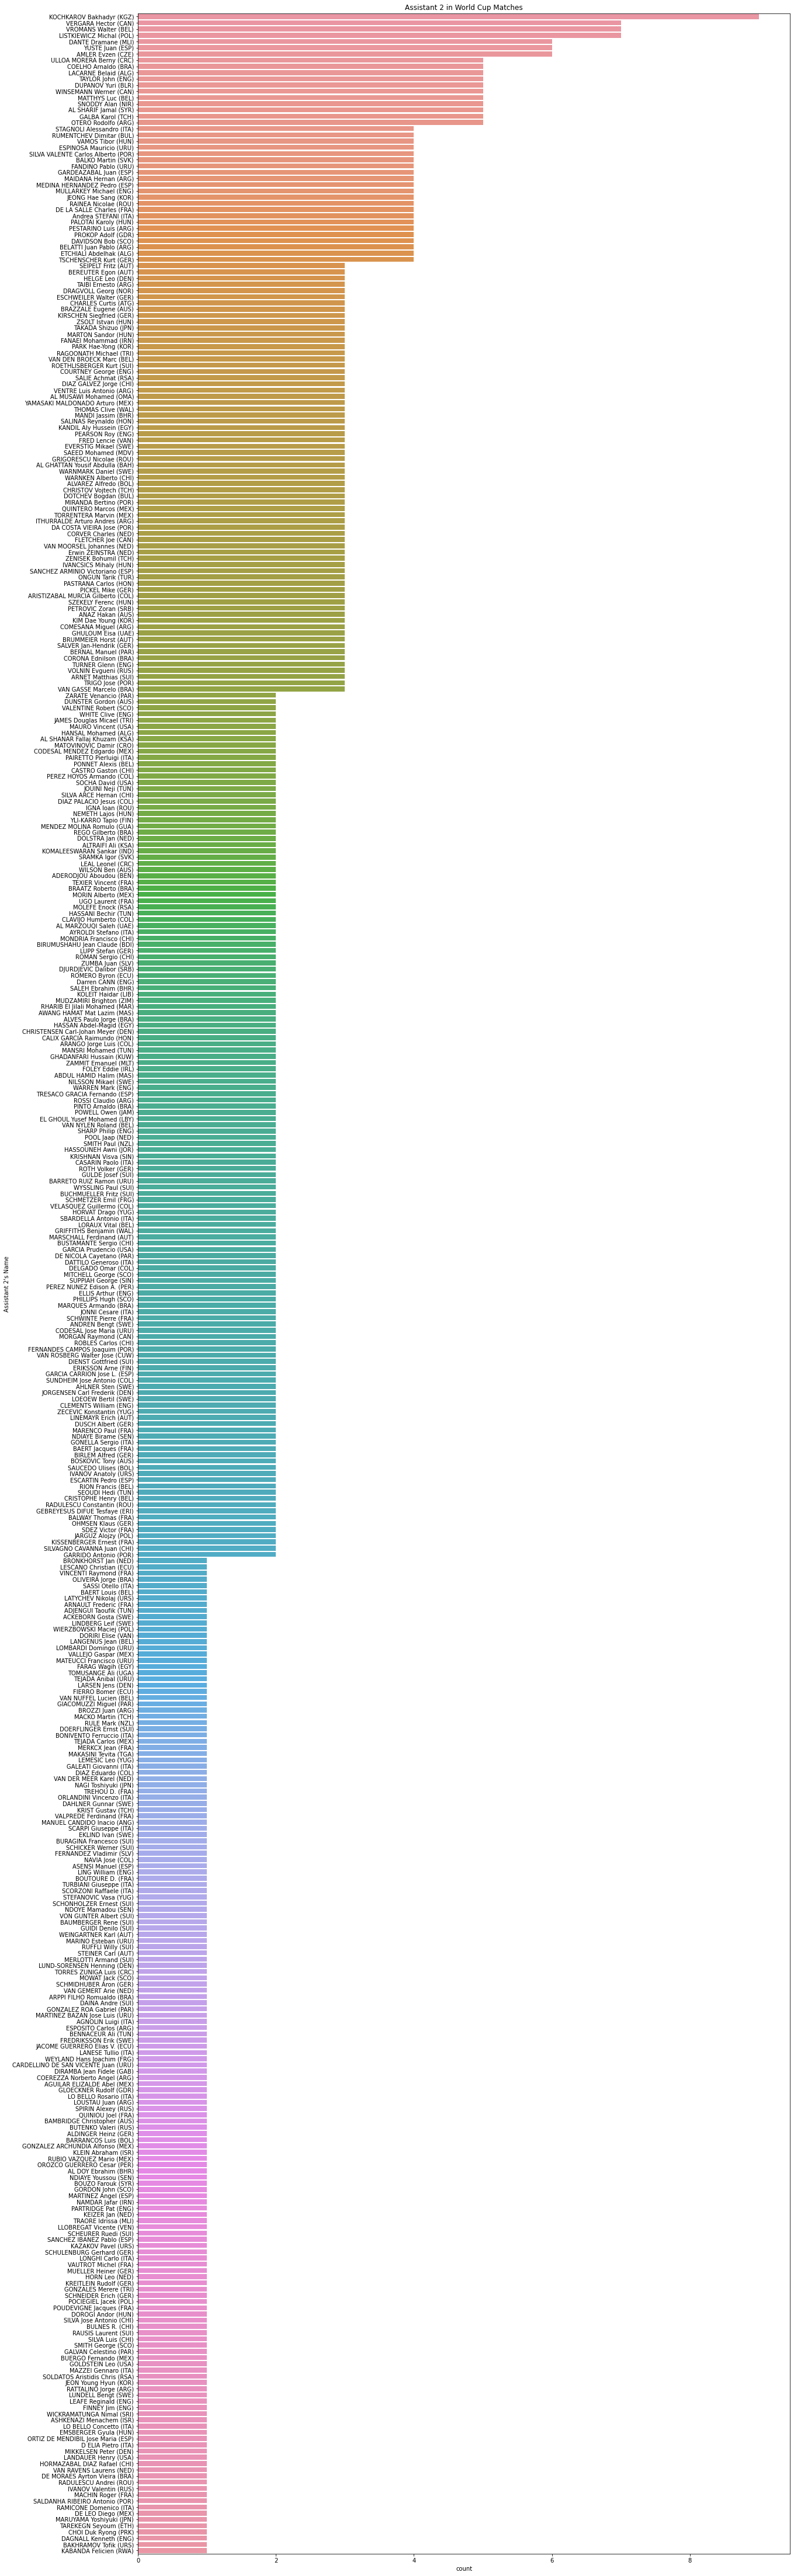

In [37]:
# Count plot showing the Assisnt 2 for each World Cup

fig, ax = plt.subplots(figsize=(20,80))

sns.countplot(data = df, y = 'Assistant 2', order = df['Assistant 2'].value_counts().index)

ax.set(title = 'Assistant 2 in World Cup Matches')
ax.set(ylabel = "Assistant 2's Name");

- The list of Assistant 2 that have called a World Cup Match.

### Stage Visual

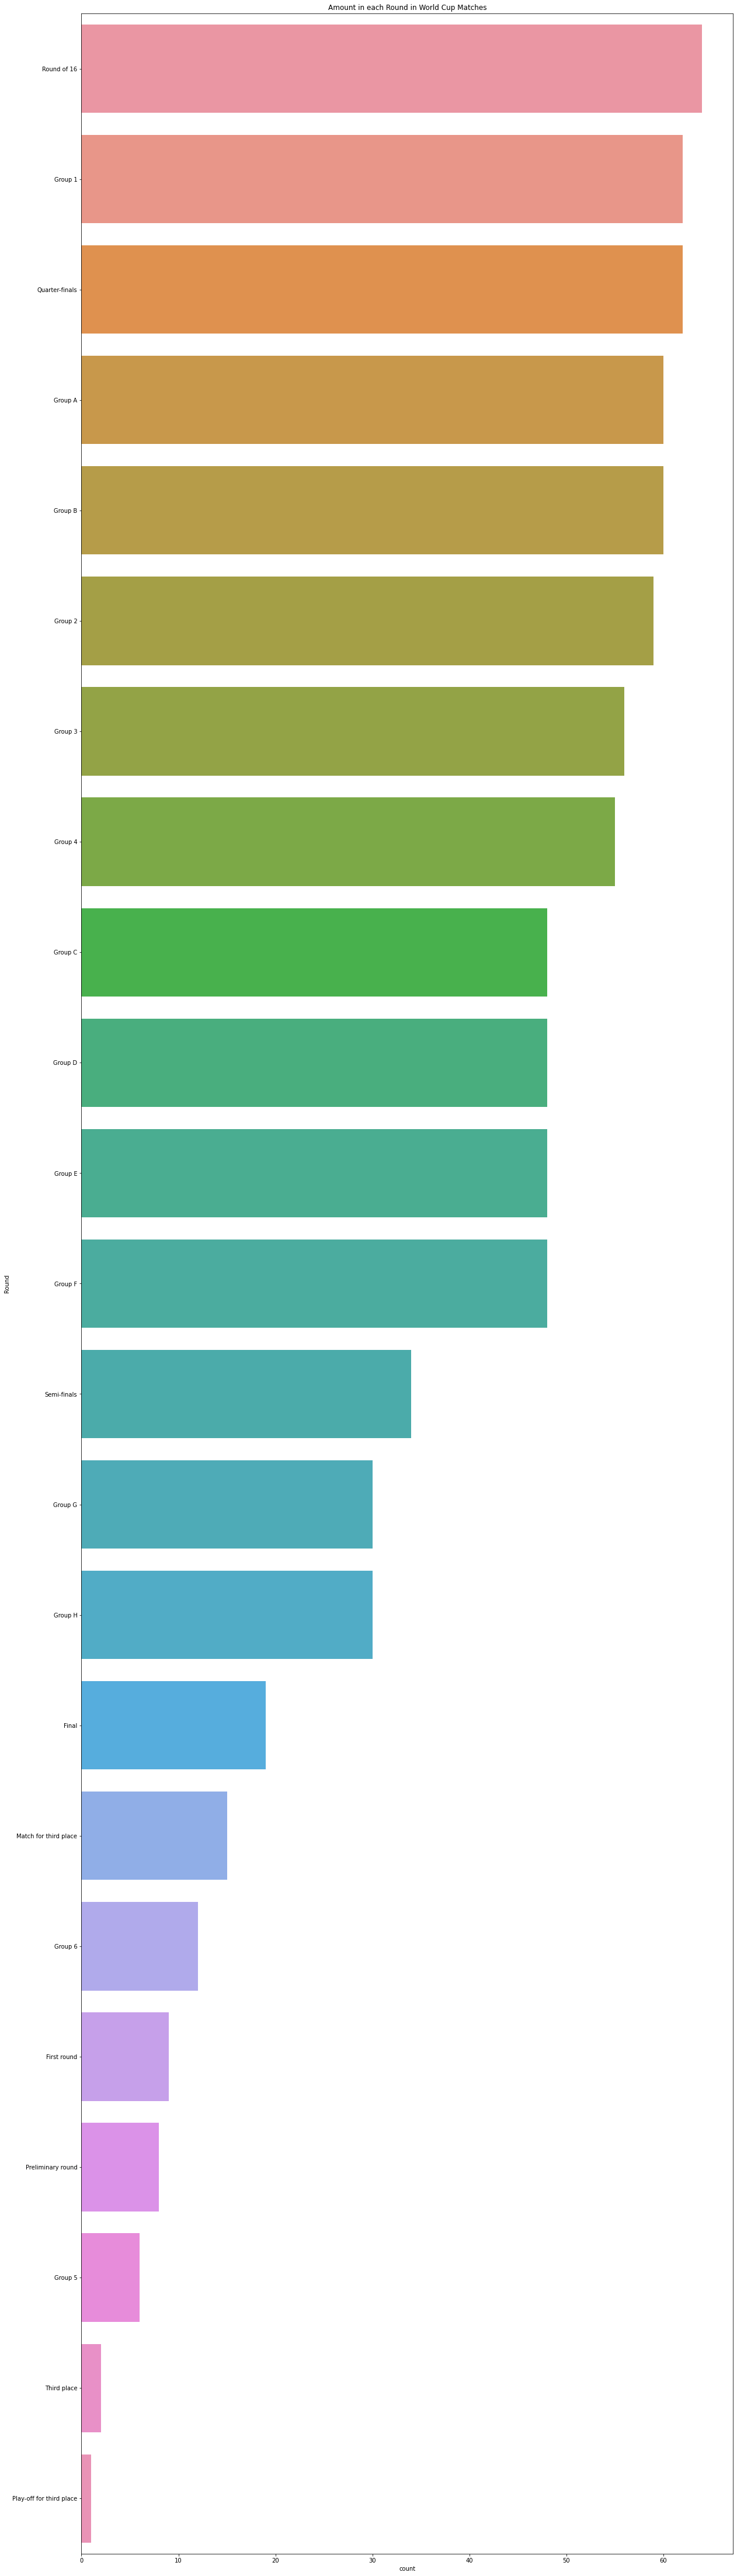

In [38]:
# Count plot showing the Round for each World Cup

fig, ax = plt.subplots(figsize=(20,80))

sns.countplot(data = df, y = 'Stage', order = df['Stage'].value_counts().index)

ax.set(title = 'Amount in each Round in World Cup Matches')
ax.set(ylabel = "Round");

- This graph shows the round each World Cup Match was played in

## Questions

1. Source of data:
  - https://www.kaggle.com/datasets/abecklas/fifa-world-cup

2. Brief description of data
  - This is dataset of teams that have played in the World Cup, their scores and locations they played

3. What is the target?
  - The target will be outcome, I will need to fill in some data or create a new column since they don't necessarily say who wins but the data is there.

4. What does one row represent? (A person?  A business?  An event? A product?)
  - A row is a single match that was played.

5. Is this a classification or regression problem?
  - This is a classifcation problem. 

6. How many features does the data have?
  - 20 features

7. How many rows are in the dataset?
  - 4,571 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - I don't see many issues, just need to create/fill in a column to help show the winner clearer.